In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  898 non-null    object 
 1   Father  898 non-null    float64
 2   Mother  898 non-null    float64
 3   Gender  898 non-null    object 
 4   Height  898 non-null    float64
 5   Kids    898 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 42.2+ KB


In [4]:
df = df[df.Gender == 'M'] # 남자인 아이만 뽑기
height = df[['Father', 'Height']].rename(columns={'Height':'Son'}) # height이라는 새로운 데이터프레임을 생성 / height의 column은 Son으로 변경한다.
height.Father = height.Father * 2.54 # 인치를 cm로 변환
height.Son = height.Son * 2.54 # 인치를 cm로 변환
height.describe()

,Father,Son
count,465.000000,465.000000
mean,175.687157,175.841196
std,5.841820,6.684249
min,157.480000,152.400000
25%,172.720000,171.450000
50%,175.260000,175.768000
75%,179.070000,180.340000
max,199.390000,200.660000


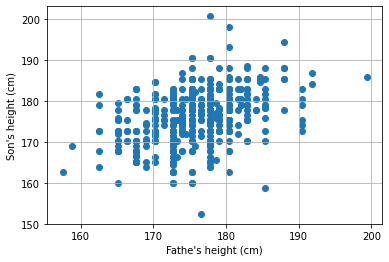

In [7]:
plt.scatter(height.Father, height.Son)
plt.xlabel("Fathe's height (cm)")
plt.ylabel("Son's height (cm)")
plt.grid()
plt.show()

### Numpy를 이용해서 회귀선 구하기

In [8]:
A = np.vstack([height.Father, np.ones(len(height.Father))]).T # np.ones = 465개(아빠의 키)만큼 1로 채워진 값
A.shape

(465, 2)

In [9]:
reg = np.linalg.lstsq(A, height.Son, rcond=None)
reg

(array([ 0.44774792, 97.17763701]),
 array([17556.59951549]),
 2,
 array([3.79064358e+03, 7.15847817e-01]))

In [10]:
# 기울기와 절편(첫번째 값이 기울기, 두번째 값이 절편)
m, c = reg[0]

In [11]:
# 잔차 제곱의 합
rss = reg[1][0]

In [16]:
print(f'기울기: {m:.4f}, 절편: {c:.4f}, 잔차 제곱: {rss:.2f}')

기울기: 0.4477, 절편: 97.1776, 잔차 제곱: 17556.60


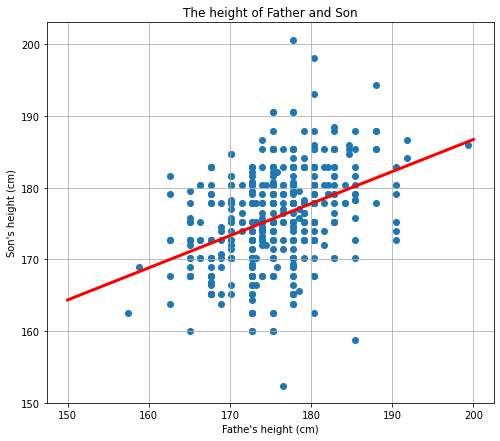

In [17]:
plt.figure(figsize=(8,7))
plt.scatter(height.Father, height.Son)
plt.plot([150,200], [m*150+c,m*200+c], 'r', lw=3)
# 150과 200은 임의의 수
plt.title('The height of Father and Son')
plt.xlabel("Fathe's height (cm)")
plt.ylabel("Son's height (cm)")
plt.grid()
plt.show()

### Scikit-Learn을 이용해서 구하기

In [18]:
from sklearn.linear_model import LinearRegression

In [20]:
X = height.Father.values.reshape(-1,1)
# x가 1차원이면 선형 회귀식의 x값으로 줄 수 없다. values까지만하면 1차원이기때문에, reshape(-1,1)을 적어야함
y = height.Son.values

In [21]:
lr = LinearRegression()
lr.fit(X, y) # 리니어 리그레션 학습

LinearRegression()

In [23]:
weight, bias = lr.coef_, lr.intercept_ #coefficient, intercept
# lr.coef_는 다차원으로, 리스트로 되어있기때문에 [0]이라는값도 알아야 구할 수 있다.
rss = lr._residues
print(f'기울기: {weight[0]:.4f}, 절편: {bias:.4f}, 잔차 제곱: {rss:.2f}')

기울기: 0.4477, 절편: 97.1776, 잔차 제곱: 17556.60


In [24]:
score = lr.score(X, y)
print(f'R_squared score: {score:.4f}')

R_squared score: 0.1531


## 당뇨병 데이터셋

In [27]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [28]:
# 당뇨병 1년 후의 진행률
diabetes.target[:5]

array([151.,  75., 141., 206., 135.])

In [33]:
# reshape은 꼭 써주는편이 좋다.
X = diabetes.data[:, 2].reshape(-1,1)
y = diabetes.target

In [34]:
X.shape

(442, 1)

In [35]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [36]:
weight, bias = lr.coef_, lr.intercept_ #coefficient, intercept
rss = lr._residues
print(f'기울기: {weight[0]:.4f}, 절편: {bias:.4f}, 잔차 제곱: {rss:.2f}')

기울기: 949.4353, 절편: 152.1335, 잔차 제곱: 1719581.81


### 훈련/테스트 데이터 셋 분리 후 학습/예측/평가

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=2021
)

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
pred = lr.predict(X_test) # 예측값 구하기

In [43]:
# 모델 평가하기 (선형회귀에서 사용하는 주요 평가지표)
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse) # mse값이 너무 크기때문에, 루트를 씌워서 보는 값
print(f'Mean Squared Error: {mse:.4f}, RMSE: {rmse:.4f}')

Mean Squared Error: 3470.1713, RMSE: 58.9082


In [48]:
score = r2_score(y_test, pred)
print(f'R_squared: {score:.4f}')

R_squared: 0.0939


### 그래프로 확인

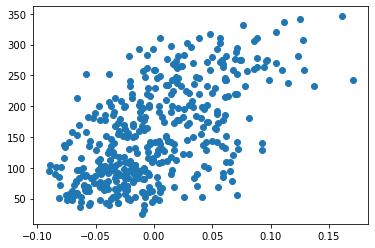

In [49]:
plt.scatter(X_train, y_train)
plt.show()

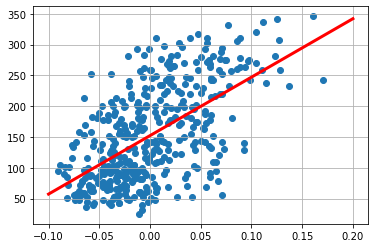

In [51]:
plt.scatter(X_train, y_train)
plt.plot([-0.1, 0.2], [-0.1*weight+bias, 0.2*weight+bias], 'r', lw=3)
plt.grid()
plt.show()

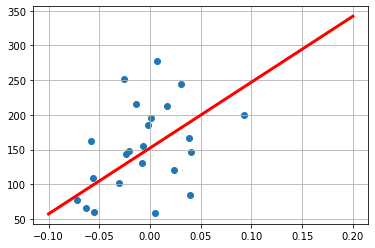

In [52]:
plt.scatter(X_test, y_test)
plt.plot([-0.1, 0.2], [-0.1*weight+bias, 0.2*weight+bias], 'r', lw=3)
plt.grid()
plt.show()

### 당뇨병 vs BP

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data[:, 3], y, test_size=0.05, random_state=2021
)

In [56]:
X_train, X_test = X_train.reshape(-1,1), X_test.reshape(-1,1)

In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [58]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse:.4f}, RMSE: {rmse:.4f}')
score = r2_score(y_test, pred)
print(f'R_squared: {score:.4f}')

Mean Squared Error: 1999.8592, RMSE: 44.7198
R_squared: 0.4778


In [59]:
weight, bias = lr.coef_, lr.intercept_
rss = lr._residues
print(f'기울기: {weight[0]:.4f}, 절편: {bias:.4f}, 잔차 제곱: {rss:.2f}')

기울기: 702.8299, 절편: 151.8194, 잔차 제곱: 2064342.24


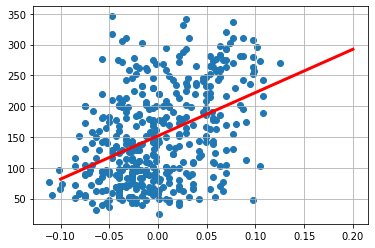

In [60]:
plt.scatter(X_train, y_train)
plt.plot([-0.1, 0.2], [-0.1*weight+bias, 0.2*weight+bias], 'r', lw=3)
plt.grid()
plt.show()

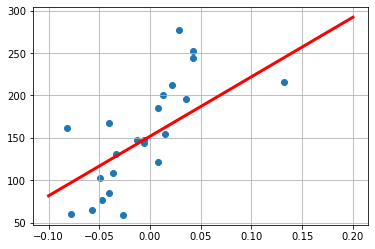

In [61]:
plt.scatter(X_test, y_test)
plt.plot([-0.1, 0.2], [-0.1*weight+bias, 0.2*weight+bias], 'r', lw=3)
plt.grid()
plt.show()

### 회귀 표본 만들기

In [62]:
# make_regression : 데이터를 만들어주는 값
from sklearn.datasets import make_regression

In [84]:
# n_features : 독립변수가 몇개인가
X, y = make_regression(n_samples=100, n_features=1, n_targets=1, random_state=2021)

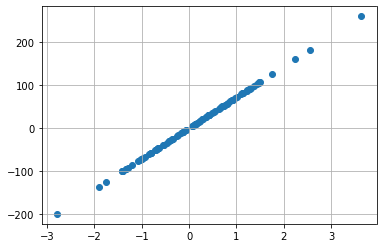

In [85]:
plt.scatter(X, y)
plt.grid()
plt.show()

In [91]:
X, y = make_regression(n_samples=100, n_features=1, n_targets=1, random_state=2021, noise=100)

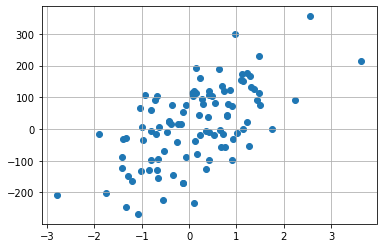

In [92]:
plt.scatter(X, y)
plt.grid()
plt.show()

In [93]:
lr = LinearRegression()
lr.fit(X, y)
pred = lr.predict(X_test) # 예측값 구하기

In [94]:
weight, bias = lr.coef_, lr.intercept_ #coefficient, intercept
rss = lr._residues

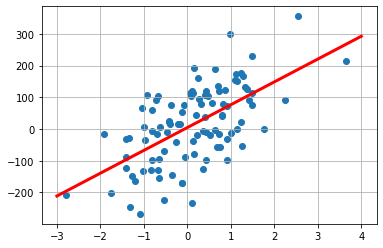

In [95]:
plt.scatter(X, y)
plt.plot([-3, 4], [-3*weight+bias, 4*weight+bias], 'r', lw=3)
plt.grid()
plt.show()